# Image Classification using CNN for CIFAR-10 Data

Steps
Part-I. Baseline Model

In [ ]:
# 1. Import Baseline Model
import tensorflow as tf
from __future__ import print_function
import keras
from keras import datasets, layers, models
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# 2. Load the data and print the shape of training and test samples

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
# 3. Print the shape of one image

In [ ]:
x_train[444].shape

(32, 32, 3)

In [ ]:
# 4. Display one image using imshow() function

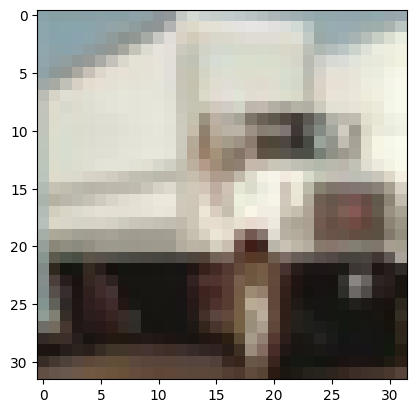

In [ ]:
#print(y_train[444])
plt.imshow(x_train[444])

In [ ]:
# 5. convert y_train and y_test into categorical values

In [ ]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
# 6. Convert train data into float and scale
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

In [ ]:
# 7. Build your first CNN

In [ ]:
model1 = Sequential()
model1.add(Conv2D(32, (5, 5), strides=(2, 2), activation='relu', padding='same', input_shape=(32, 32, 3)))
model1.add(Conv2D(32, (5, 5), strides=(2, 2), activation='relu', padding='same'))
model1.add(Dropout(0.25))
model1.add(Flatten())
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(10, activation='softmax'))
model1.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        2432      
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 32)          25632     
                                                                 
 dropout (Dropout)           (None, 8, 8, 32)          0         
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 10)               

In [ ]:
history1 = model1.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6042 - accuracy: 0.4164 - val_loss: 1.3378 - val_accuracy: 0.5274
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3049 - accuracy: 0.5317 - val_loss: 1.2325 - val_accuracy: 0.5626
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1746 - accuracy: 0.5797 - val_loss: 1.1004 - val_accuracy: 0.6079
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0821 - accuracy: 0.6160 - val_loss: 1.0495 - val_accuracy: 0.6293
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0139 - accuracy: 0.6405 - val_loss: 0.9987 - val_accuracy: 0.6498
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9516 - accuracy: 0.6611 - val_loss: 0.9707 - val_accuracy: 0.6606
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8993 - accuracy: 0.6800 - val_loss: 0.9725 - val_accuracy:

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [ ]:
model2 = models.Sequential()

model2.add(Conv2D(64, (5,5), padding='same', activation='relu', input_shape=(32,32,3)))
model2.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model2.add(Dropout(0.25))

model2.add(Flatten())

model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.25))

model2.add(Dense(10, activation='softmax'))


In [ ]:
model2.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model2.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[callback])

Epoch 1/10
1563/1563 [==============================] - 17s 10ms/step - loss: 1.5276 - accuracy: 0.4501 - val_loss: 1.2230 - val_accuracy: 0.5630
Epoch 2/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.2027 - accuracy: 0.5713 - val_loss: 1.0510 - val_accuracy: 0.6281
Epoch 3/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.0488 - accuracy: 0.6268 - val_loss: 1.0080 - val_accuracy: 0.6472
Epoch 4/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9451 - accuracy: 0.6646 - val_loss: 0.9479 - val_accuracy: 0.6724
Epoch 5/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.8602 - accuracy: 0.6932 - val_loss: 0.9586 - val_accuracy: 0.6681
Epoch 6/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.7882 - accuracy: 0.7187 - val_loss: 0.9501 - val_accuracy: 0.6735
Epoch 7/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.7236 - accuracy: 0.7417 - val_loss: 0.9582 - val

In [ ]:
# 8. Print the summary and verify your configuration

In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        4864      
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 16, 16, 128)       0         
                                                                 
 flatten_2 (Flatten)         (None, 32768)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               4194432   
                                                      

In [ ]:
# 9. compile and fit and validate your model with the following parameters

In [ ]:
opt = tf.keras.optimizers.RMSprop(learning_rate=0.0005, weight_decay=1e-6)
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history3 = model2.fit(x_train, y_train, batch_size=32, epochs=15, validation_data=(x_test, y_test), shuffle=True)

Epoch 1/15
1563/1563 [==============================] - 19s 10ms/step - loss: 0.4714 - accuracy: 0.8292 - val_loss: 1.0793 - val_accuracy: 0.6971
Epoch 2/15
1563/1563 [==============================] - 15s 10ms/step - loss: 0.4560 - accuracy: 0.8375 - val_loss: 1.0890 - val_accuracy: 0.6947
Epoch 3/15
1563/1563 [==============================] - 17s 11ms/step - loss: 0.4626 - accuracy: 0.8358 - val_loss: 1.2366 - val_accuracy: 0.6995
Epoch 4/15
1563/1563 [==============================] - 16s 10ms/step - loss: 0.4763 - accuracy: 0.8354 - val_loss: 1.2204 - val_accuracy: 0.7014
Epoch 5/15
1563/1563 [==============================] - 16s 10ms/step - loss: 0.5000 - accuracy: 0.8295 - val_loss: 1.2011 - val_accuracy: 0.7046
Epoch 6/15
1563/1563 [==============================] - 16s 10ms/step - loss: 0.5214 - accuracy: 0.8266 - val_loss: 1.1215 - val_accuracy: 0.6789
Epoch 7/15
1563/1563 [==============================] - 16s 10ms/step - loss: 0.5524 - accuracy: 0.8159 - val_loss: 1.1080 -

### Part-II. Model Improvements

In [ ]:
# 1. Build a more complicated model with the following pattern: conv->conv->MaxPool->conv->conv->MaxPool->(Flatten)->Dense->Final Classification

In [ ]:
model3 = models.Sequential()

model3.add(Conv2D(64, (5,5), padding='same', activation='relu', input_shape=(32,32,3)))
model3.add(Conv2D(128, (3,3), padding='same', activation='relu'))

#2. use strides of 1 for all convolutional layers.
model3.add(MaxPooling2D(pool_size=(1,1),strides=(1,1)))

model3.add(Conv2D(64, (5,5), padding='same', activation='relu', input_shape=(32,32,3)))
model3.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))

model3.add(Flatten())

model3.add(Dense(10, activation='softmax'))

In [ ]:
# 3. How many parameters does your model have? How does that compare to the previous model?

In [ ]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 64)        4864      
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 32, 32, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 64)        204864    
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 31, 31, 128)       0         
 g2D)                                                 

In [ ]:
opt = tf.keras.optimizers.RMSprop(learning_rate=0.0005, weight_decay=1e-6)
model3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# 4. Train it for 5 epochs

In [ ]:
history4 = model3.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), shuffle=True)

Epoch 1/5
1563/1563 [==============================] - 36s 17ms/step - loss: 1.4282 - accuracy: 0.4934 - val_loss: 1.2869 - val_accuracy: 0.5655
Epoch 2/5
1563/1563 [==============================] - 25s 16ms/step - loss: 0.9570 - accuracy: 0.6691 - val_loss: 1.0420 - val_accuracy: 0.6540
Epoch 3/5
1563/1563 [==============================] - 25s 16ms/step - loss: 0.7627 - accuracy: 0.7388 - val_loss: 0.8179 - val_accuracy: 0.7220
Epoch 4/5
1563/1563 [==============================] - 26s 16ms/step - loss: 0.6274 - accuracy: 0.7876 - val_loss: 0.8677 - val_accuracy: 0.7203
Epoch 5/5
1563/1563 [==============================] - 25s 16ms/step - loss: 0.5068 - accuracy: 0.8312 - val_loss: 0.8684 - val_accuracy: 0.7248


In [ ]:
# 5. Try different structures and run times, and see how accurate your model can be

In [ ]:
model4 = models.Sequential()

model4.add(layers.Conv2D(64, (5,5), padding='same', activation='relu', input_shape=(32,32,3)))
model4.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model4.add(layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model4.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model4.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model4.add(layers.MaxPooling2D(pool_size=(2,2)))

model4.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model4.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model4.add(layers.MaxPooling2D(pool_size=(2,2)))

model4.add(layers.Flatten())
model4.add(layers.Dense(128, activation='relu'))
model4.add(layers.Dense(64, activation='relu'))
model4.add(layers.Dense(10, activation='softmax'))

model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 64)        4864      
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 16, 16, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 16, 16, 128)       147584    
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 8, 8, 128)         0         
 g2D)                                                 

In [ ]:
opt = tf.keras.optimizers.RMSprop(learning_rate=0.0005, weight_decay=1e-6)
model4.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history5 = model4.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), shuffle=True)

Epoch 1/5
1563/1563 [==============================] - 24s 13ms/step - loss: 1.6434 - accuracy: 0.4001 - val_loss: 1.5742 - val_accuracy: 0.4777
Epoch 2/5
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0863 - accuracy: 0.6163 - val_loss: 1.0355 - val_accuracy: 0.6390
Epoch 3/5
1563/1563 [==============================] - 18s 12ms/step - loss: 0.8172 - accuracy: 0.7143 - val_loss: 0.8812 - val_accuracy: 0.6980
Epoch 4/5
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6630 - accuracy: 0.7701 - val_loss: 0.7358 - val_accuracy: 0.7546
Epoch 5/5
1563/1563 [==============================] - 17s 11ms/step - loss: 0.5477 - accuracy: 0.8108 - val_loss: 0.6910 - val_accuracy: 0.7707


In [ ]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
y_pred = model4.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [ ]:
y_pred[:5]

array([[4.4679065e-04, 5.8120604e-05, 4.3372897e-04, 3.1337368e-01,
        5.9574505e-04, 6.8033594e-01, 9.1570284e-04, 3.3867925e-03,
        3.5844397e-04, 9.5004012e-05],
       [6.6371664e-05, 4.1186428e-05, 1.0006554e-07, 1.8627530e-08,
        4.5402061e-08, 3.3704874e-09, 4.4445057e-09, 1.4608950e-09,
        9.9987674e-01, 1.5447471e-05],
       [1.8012992e-01, 1.6189067e-02, 1.1599353e-02, 4.3539252e-02,
        1.1425370e-03, 4.5689321e-03, 1.4122219e-03, 1.9070515e-03,
        7.3701179e-01, 2.4997985e-03],
       [8.7531686e-01, 3.3873897e-03, 8.1409834e-02, 8.7028807e-03,
        3.1150822e-03, 1.9587803e-04, 5.4013554e-04, 3.9551491e-05,
        2.4085794e-02, 3.2065779e-03],
       [1.9560523e-05, 6.2965673e-06, 6.7204651e-03, 3.3282279e-03,
        2.1612689e-02, 1.7157724e-04, 9.6808761e-01, 8.3921686e-06,
        3.6087509e-05, 9.0921940e-06]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[5, 8, 8, 0, 6]

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
y_test[:5]

array([0., 0., 0., 1., 0.], dtype=float32)

In [ ]:
y_pred = model3.predict(x_test)
y_classes = [np.argmax(element) for element in y_pred]

y_test[:5]

313/313 [==============================] - 2s 5ms/step


array([0., 0., 0., 1., 0.], dtype=float32)

In [ ]:
y_classes[:5]

[3, 8, 8, 0, 6]

In [ ]:
def plot_images(X, y, index):
  #plt.figure(figsize = (10, 10))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])


In [ ]:
y_test = y_test.astype(int)

In [ ]:
y_train.astype(int)

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]])

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

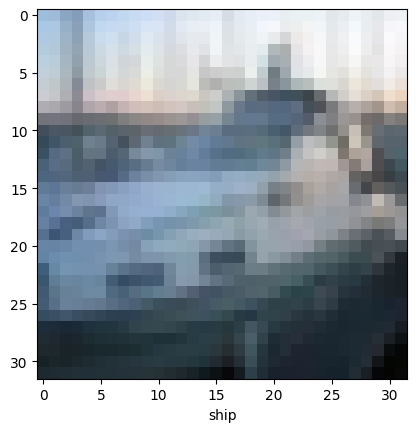

In [ ]:
plot_images(x_test, y_test, 2)

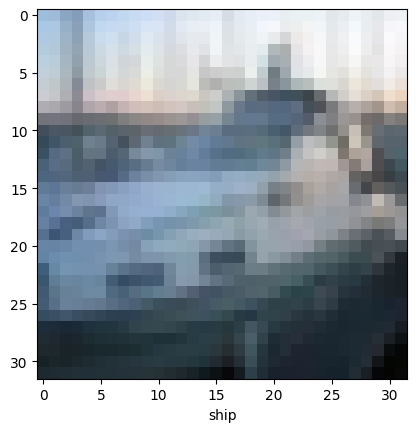

In [ ]:
plot_images(x_test, y_classes, 2)